In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role
import sagemaker
import os
import re
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()
bucket

'sagemaker-us-east-1-561941966718'

In [3]:
ltc_df = pd.read_csv('Data/ltc.csv')

In [4]:
ltc_df.describe()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
count,2958.000000,2958.000000,2.958000e+03,2954.000000,2416.000000,2.416000e+03,2.958000e+03,2.954000e+03,2952.000000,2416.000000,...,2.416000e+03,2952.000000,2416.000000,2.952000e+03,2416.000000,2.952000e+03,2.416000e+03,2236.000000,2386.000000,2356.000000
mean,38209.523665,586.499662,7.644447e+06,13151.830009,0.965406,1.991616e+09,1.624663e+09,2.194553e+06,0.015014,0.070193,...,3.922304e+07,210.017256,3284.971006,2.396927e+00,14.174055,4.735392e+06,2.213310e+08,0.062254,0.057527,0.059014
std,52681.020052,184.783771,9.927067e+06,17071.571015,0.749679,3.012925e+09,2.403833e+09,4.078908e+06,0.027062,0.104026,...,9.424211e+07,361.556469,6538.361427,3.913229e+00,25.845424,9.224940e+06,6.434018e+08,0.025608,0.038994,0.033949
min,0.000000,0.000000,0.000000e+00,215.000000,0.112054,2.096670e+07,0.000000e+00,2.441406e-04,0.000011,0.000450,...,3.182713e+05,0.081135,35.141660,1.000000e-08,0.000239,2.251838e+04,4.308554e+05,0.020473,0.006222,0.009074
25%,9254.000000,554.000000,2.223966e+06,3828.326329,0.527239,1.378819e+08,4.525863e+07,1.080641e+03,0.001228,0.016867,...,2.801146e+06,41.220550,587.539038,1.317179e-01,0.931079,9.114111e+05,8.598664e+06,0.044601,0.032744,0.036564
50%,15359.000000,582.000000,3.666578e+06,6271.042391,0.699116,2.354547e+08,2.868276e+08,4.802207e+04,0.003307,0.034233,...,8.970058e+06,117.747673,1303.710591,4.902433e-01,7.920294,2.121491e+06,3.910491e+07,0.056384,0.048187,0.052943
75%,63253.000000,611.000000,1.210338e+07,20597.958310,1.283100,3.169079e+09,2.166591e+09,1.033043e+06,0.015741,0.081892,...,3.720409e+07,249.713939,3132.805085,3.398501e+00,15.070599,4.869476e+06,1.578094e+08,0.077819,0.069066,0.071947
max,601822.000000,9685.000000,1.199902e+08,204412.596252,14.716638,1.952270e+10,7.300978e+09,1.651091e+07,0.378603,1.436288,...,1.944886e+09,7968.250087,113131.309338,5.000000e+01,253.263087,1.431910e+08,1.232047e+10,0.154403,0.335382,0.254737


In [5]:
ltc_df['PriceUSD'].describe()

count    2416.000000
mean       36.140380
std        52.659645
min         1.159542
25%         3.482312
50%         7.587477
75%        55.061623
max       359.072629
Name: PriceUSD, dtype: float64

In [6]:
ltc_df.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2011-10-07,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-10-08,2,2,430,215.0,NaN,NaN,0.0,0.000244,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-10-09,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-10-10,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-10-11,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(ltc_df)

2958

In [8]:
x_labels = [ltc_df['date'][0],ltc_df['date'][365],ltc_df['date'][365*2],ltc_df['date'][365*3],ltc_df['date'][365*4], \
           ltc_df['date'][365*5], ltc_df['date'][365*6],ltc_df['date'][365*7], ltc_df['date'][365*8]]

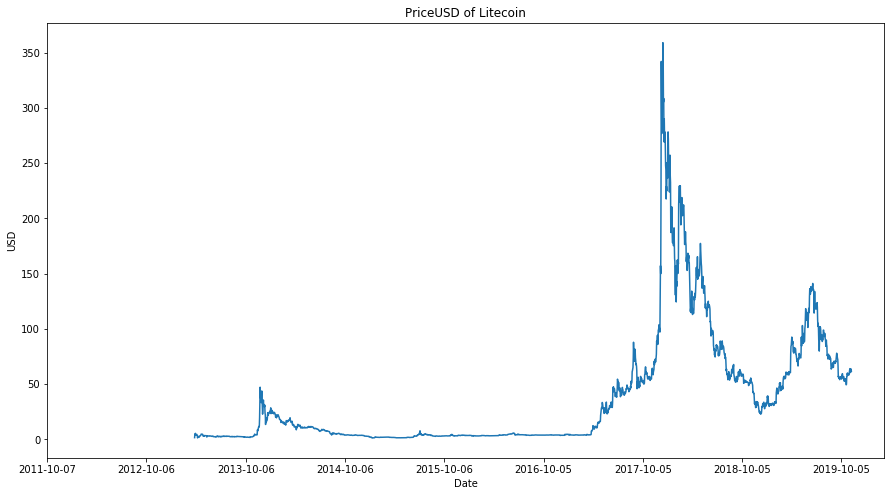

In [9]:
plt.figure(figsize=(15,8))
plt.plot(ltc_df.index, ltc_df['PriceUSD'])
plt.title('PriceUSD of Litecoin')
plt.xticks(np.arange(len(ltc_df), step=365), labels = x_labels)
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

In [10]:
ltc_df_3yr = ltc_df[1862:]
ltc_df_3yr.index = np.arange(len(ltc_df_3yr))

In [11]:
ltc_df_3yr.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2016-11-11,7301,638,1962084,3075.366771,0.657791,1.844730e+08,2.804431e+08,53827.569370,0.006044,...,1.946260e+06,147.744617,563.151417,0.616035,2.348112,1.310052e+06,4.993464e+06,0.029249,0.016593,0.012424
1,2016-11-12,10630,576,2417247,4196.609375,0.647167,1.814419e+08,2.803635e+08,53827.569370,0.007412,...,2.803788e+06,233.870536,876.525329,0.159891,0.599259,2.545915e+06,9.541855e+06,0.029240,0.016358,0.012601
2,2016-11-13,15468,561,2550985,4547.210339,0.671392,1.882939e+08,2.804530e+08,57164.083717,0.004974,...,5.399170e+06,339.766758,1321.121208,0.013982,0.054368,6.012513e+06,2.337856e+07,0.029359,0.017770,0.013482
3,2016-11-14,13481,605,2800901,4629.588430,0.667102,1.871896e+08,2.806010e+08,58578.291575,0.006038,...,3.757638e+06,234.939070,907.877015,0.028395,0.109729,3.063840e+06,1.183962e+07,0.029357,0.017801,0.013501
4,2016-11-15,10544,588,2694323,4582.181973,0.673017,1.889013e+08,2.806781e+08,58578.291575,0.004643,...,4.545794e+06,392.344821,1529.540788,0.500000,1.949230,4.390339e+06,1.711556e+07,0.029131,0.017859,0.013542


In [12]:
ltc_df_3yr['PriceUSD'].describe()

count    1096.000000
mean       72.857709
std        60.026703
min         3.500897
25%        32.738168
50%        57.567868
75%        92.555020
max       359.072629
Name: PriceUSD, dtype: float64

In [13]:
x_labels = [ltc_df_3yr['date'][0], ltc_df_3yr['date'][365], ltc_df_3yr['date'][365*2], ltc_df_3yr['date'][365*3]]

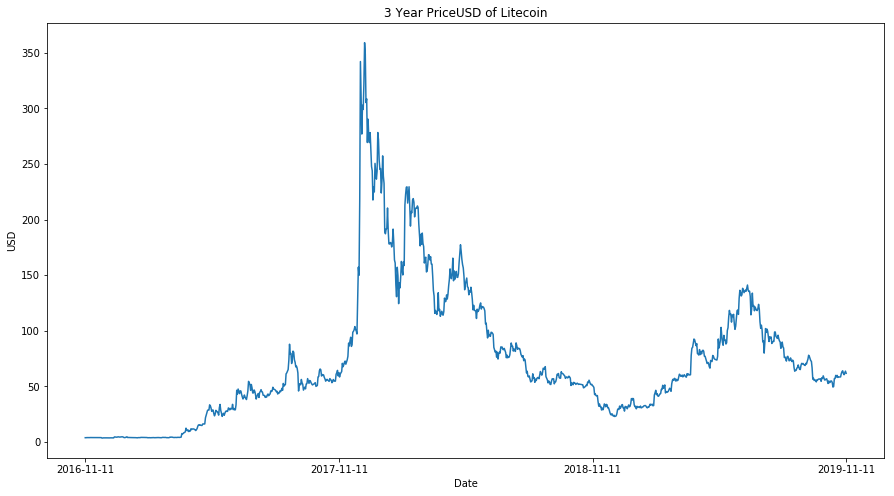

In [14]:
plt.figure(figsize=(15,8))
plt.plot(ltc_df_3yr.index, ltc_df_3yr['PriceUSD'])
plt.title('3 Year PriceUSD of Litecoin')
plt.xticks(np.arange(len(ltc_df_3yr), step=365), labels=x_labels)
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

In [15]:
ltc_df['PriceUSD'][530:550]

530         NaN
531         NaN
532         NaN
533         NaN
534         NaN
535         NaN
536         NaN
537         NaN
538         NaN
539         NaN
540         NaN
541         NaN
542    1.516680
543    4.614541
544    4.614541
545    5.400204
546    3.726269
547    3.726269
548    3.726269
549    4.264811
Name: PriceUSD, dtype: float64

In [16]:
ltc_df['date'][542]

'2013-04-01'

In [17]:
ltc_df_0413 = ltc_df[542:]

In [18]:
ltc_df_0413.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
542,2013-04-01,11649,742,3973650,5355.323450,14.716638,2.466248e+07,1.675823e+06,99.963803,0.065012,...,2.782745e+06,242.435717,367.697476,5.971298,9.056550,3.053478e+06,4.631150e+06,NaN,NaN,NaN
543,2013-04-02,17131,902,5321624,5899.804878,8.935656,7.524414e+07,8.420663e+06,100.543923,0.063475,...,9.850541e+06,184.623468,851.952504,5.337660,24.630850,3.586126e+06,1.654833e+07,NaN,NaN,NaN
544,2013-04-03,17130,896,4728976,5277.875000,7.131525,7.545076e+07,1.057989e+07,125.505161,0.062112,...,4.936497e+06,84.532794,390.080018,5.002255,23.083108,1.630299e+06,7.523083e+06,NaN,NaN,NaN
545,2013-04-04,16542,772,5201142,6737.230570,7.224639,8.850532e+07,1.225048e+07,153.168086,0.069217,...,4.456535e+06,64.393878,347.740104,4.686453,25.307805,1.258578e+06,6.796580e+06,NaN,NaN,NaN
546,2013-04-05,16353,786,5973976,7600.478372,4.826198,6.121712e+07,1.268433e+07,153.168086,0.070585,...,2.741063e+06,84.983637,316.671868,4.482181,16.701810,1.551801e+06,5.782428e+06,NaN,NaN,NaN


In [19]:
542 + 180

722

In [20]:
ltc_df[532:542]

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
532,2013-03-22,4745,288,1458545,5064.392361,NaN,NaN,0.0,91.367983,0.067610,...,NaN,174.081715,NaN,5.082578,NaN,8.535226e+05,NaN,NaN,NaN,NaN
533,2013-03-23,5962,564,1668900,2959.042553,NaN,NaN,0.0,68.594138,0.062555,...,NaN,82.008031,NaN,5.000000,NaN,5.455174e+05,NaN,NaN,NaN,NaN
534,2013-03-24,6408,638,2248891,3524.907524,NaN,NaN,0.0,68.594138,0.072429,...,NaN,94.730617,NaN,5.098909,NaN,7.586975e+05,NaN,NaN,NaN,NaN
535,2013-03-25,8511,811,2767288,3412.192355,NaN,NaN,0.0,69.157177,0.064096,...,NaN,69.706269,NaN,6.075302,NaN,7.111434e+05,NaN,NaN,NaN,NaN
536,2013-03-26,7469,699,2451257,3506.805436,NaN,NaN,0.0,78.309551,0.066532,...,NaN,86.461615,NaN,6.489553,NaN,7.505733e+05,NaN,NaN,NaN,NaN
537,2013-03-27,7708,731,2006736,2745.192886,NaN,NaN,0.0,78.309551,0.049825,...,NaN,76.996105,NaN,6.000000,NaN,6.836484e+05,NaN,NaN,NaN,NaN
538,2013-03-28,7892,645,2407652,3732.793798,NaN,NaN,0.0,81.249023,0.055273,...,NaN,159.952478,NaN,6.000000,NaN,1.335923e+06,NaN,NaN,NaN,NaN
539,2013-03-29,7253,554,1821662,3288.198556,NaN,NaN,0.0,96.195959,0.060501,...,NaN,99.418488,NaN,6.039211,NaN,7.888857e+05,NaN,NaN,NaN,NaN
540,2013-03-30,8237,583,2028794,3479.921098,NaN,NaN,0.0,96.195959,0.061338,...,NaN,109.591730,NaN,5.000000,NaN,9.865448e+05,NaN,NaN,NaN,NaN
541,2013-03-31,8551,674,2002018,2970.353116,NaN,NaN,0.0,96.195959,0.060156,...,NaN,137.244697,NaN,5.058677,NaN,1.211459e+06,NaN,NaN,NaN,NaN


In [21]:
ltc_df[721:].head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
721,2013-09-27,8011,550,1516625,2757.500000,1.097738,4.953324e+07,4.512300e+07,1169.853151,0.011520,...,6.782188e+05,47.629993,109.146835,4.996660,11.450131,367655.919342,8.425044e+05,NaN,0.040105,0.044199
722,2013-09-28,9185,535,1994478,3727.996262,0.964144,4.332588e+07,4.493716e+07,1169.853151,0.016759,...,1.183875e+06,78.434431,157.018531,5.000000,10.009541,759088.427276,1.519625e+06,0.154403,0.046946,0.046883
723,2013-09-29,7811,509,1878554,3690.675835,1.081658,4.874858e+07,4.506838e+07,1169.853151,0.013394,...,5.704360e+05,44.084012,99.181212,4.892036,11.006213,332437.538250,7.479255e+05,0.130331,0.052007,0.049468
724,2013-09-30,8010,550,1440252,2618.640000,1.040246,4.705161e+07,4.523122e+07,1078.145373,0.010637,...,6.046908e+05,47.565133,103.157000,4.999040,10.841681,375574.287128,8.145277e+05,0.130354,0.052370,0.049642
725,2013-10-01,8318,564,1944965,3448.519504,1.105301,5.006715e+07,4.529732e+07,1064.331649,0.013736,...,4.278550e+05,33.695635,77.660086,4.999232,11.521989,279572.683021,6.443457e+05,0.129884,0.053643,0.050242


In [22]:
ltc_df[1862:]

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
1862,2016-11-11,7301,638,1962084,3075.366771,0.657791,1.844730e+08,2.804431e+08,5.382757e+04,0.006044,...,1.946260e+06,147.744617,563.151417,0.616035,2.348112,1.310052e+06,4.993464e+06,0.029249,0.016593,0.012424
1863,2016-11-12,10630,576,2417247,4196.609375,0.647167,1.814419e+08,2.803635e+08,5.382757e+04,0.007412,...,2.803788e+06,233.870536,876.525329,0.159891,0.599259,2.545915e+06,9.541855e+06,0.029240,0.016358,0.012601
1864,2016-11-13,15468,561,2550985,4547.210339,0.671392,1.882939e+08,2.804530e+08,5.716408e+04,0.004974,...,5.399170e+06,339.766758,1321.121208,0.013982,0.054368,6.012513e+06,2.337856e+07,0.029359,0.017770,0.013482
1865,2016-11-14,13481,605,2800901,4629.588430,0.667102,1.871896e+08,2.806010e+08,5.857829e+04,0.006038,...,3.757638e+06,234.939070,907.877015,0.028395,0.109729,3.063840e+06,1.183962e+07,0.029357,0.017801,0.013501
1866,2016-11-15,10544,588,2694323,4582.181973,0.673017,1.889013e+08,2.806781e+08,5.857829e+04,0.004643,...,4.545794e+06,392.344821,1529.540788,0.500000,1.949230,4.390339e+06,1.711556e+07,0.029131,0.017859,0.013542
1867,2016-11-16,10000,582,2585003,4441.585911,0.674905,1.894814e+08,2.807527e+08,5.856025e+04,0.005418,...,6.399463e+06,486.619372,1902.320982,0.750903,2.935473,5.560600e+06,2.173782e+07,0.029110,0.017719,0.013542
1868,2016-11-17,9784,571,2406839,4215.129597,0.669867,1.879858e+08,2.806317e+08,5.850966e+04,0.005320,...,4.357104e+06,396.600190,1537.722471,0.382728,1.483936,4.236880e+06,1.642749e+07,0.029049,0.017774,0.013567
1869,2016-11-18,8202,572,2006191,3507.326923,0.678636,1.904958e+08,2.807039e+08,5.850966e+04,0.005486,...,3.691043e+06,345.051715,1355.318986,0.828358,3.253684,3.106846e+06,1.220329e+07,0.029059,0.017863,0.013660
1870,2016-11-19,16810,594,2664308,4485.367003,0.681457,1.913115e+08,2.807388e+08,5.850966e+04,0.006143,...,3.072701e+06,141.623854,558.491328,0.009885,0.038980,2.346282e+06,9.252526e+06,0.029050,0.017811,0.013666
1871,2016-11-20,10318,574,2850157,4965.430314,0.672575,1.887979e+08,2.807090e+08,5.879512e+04,0.005868,...,4.437688e+06,379.313499,1475.726752,0.665555,2.589356,3.509408e+06,1.365342e+07,0.029062,0.017933,0.013698


In [23]:
ltc_df[-110:]['PriceUSD'].describe()
#test dataset

count    110.000000
mean      68.555357
std       13.050291
min       49.332035
25%       56.981879
50%       66.441480
75%       75.124631
max       98.858756
Name: PriceUSD, dtype: float64

In [24]:
2/68.555
#percentage of loss over test dataset with $2 benchmark

0.029173656188461815

In [25]:
test_df = ltc_df[-110:]['PriceUSD']

In [26]:
test_df.index = np.arange(len(test_df))

In [27]:
test_df[0]

93.3590345133107

In [28]:
test_df[-1:]

109    61.696267
Name: PriceUSD, dtype: float64

In [29]:
(61.696 - 95.359)/95.359
#percentage change between start and end of test dataset

-0.3530133495527428

In [30]:
20000*.353
#total lost if invested $20000 at beginning of test dataset and made no other moves

7060.0

In [31]:
DeepAR_test_df = ltc_df[-44:-14]

In [32]:
DeepAR_test_df['PriceUSD'].describe()

count    30.000000
mean     55.548351
std       2.374205
min      49.332035
25%      54.528554
50%      55.874914
75%      56.876014
max      59.832752
Name: PriceUSD, dtype: float64

In [34]:
DeepAR_test_df.index = np.arange(len(DeepAR_test_df))

In [35]:
DeepAR_test_df['PriceUSD']

0     54.001144
1     55.927208
2     55.765906
3     56.448218
4     56.614479
5     56.573141
6     56.786484
7     54.521839
8     57.733823
9     57.036728
10    59.436602
11    57.552446
12    55.702243
13    55.822620
14    56.532920
15    56.795286
16    54.548698
17    52.554284
18    54.901029
19    53.251189
20    53.743133
21    54.861684
22    54.768957
23    53.330875
24    49.332035
25    49.824631
26    56.902924
27    56.963597
28    59.832752
29    58.383654
Name: PriceUSD, dtype: float64

In [37]:
(58.38-54.00)/58.38

0.07502569373072975

In [38]:
20000*.075

1500.0